In [20]:
import pandas as pd

# Replace 'yourfile.csv' with the path to your CSV file
file_path = '/Users/jialuli/Desktop/CS549-naacp/TBG_unique_raw.csv'

# Load the CSV file
data = pd.read_csv(file_path)

def display_csv_headers_and_rows(data):
    

    # Display the headers
    print("Headers:")
    print(data.columns.tolist())

    # Display the first 20 rows of the CSV file
    print("\nFirst 20 rows:")
    display(data.head(20))


display_csv_headers_and_rows(data)

/Users/jialuli/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3269: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Headers:
['pub_type', 'position_section', 'position_subsection', 'hl1', 'hl2', 'author', 'lede', 'body', 'language', 'word_count', 'copyright', 'content-id', 'volume', 'issue_number', 'edition', 'pub_name', 'pub_date', 'licensor_indexing_terms', 'indexing_terms']

First 20 rows:


,pub_type,position_section,position_subsection,hl1,hl2,author,lede,body,language,word_count,copyright,content-id,volume,issue_number,edition,pub_name,pub_date,licensor_indexing_terms,indexing_terms
0,"Newspaper, Newspapers",SPORTS,NaN,Team up in air on Canada's pot issue,NaN,NaN,"calgary, alberta — some bruins rely on plant-b...",body while now legal in 13 nhl cities — seven ...,['ENGLISH'],912.0,Copyright 2018 Globe Newspaper Company All Rig...,BGLOBE-1a045630-d24e-11e8-83d5-dee7c961b652,NaN,NaN,NaN,The Boston Globe,"{'day': '18', 'month': '10', 'year': '2018'}",NaN,"{'subject': [{'score': '92', 'classCode': 'STX..."
1,"Newspaper, Newspapers",NEWS,National,Treasury worker is charged with leaks,NaN,NaN,washington — a senior treasury department empl...,body the charges reflect the latest move in th...,['ENGLISH'],273.0,Copyright 2018 Globe Newspaper Company All Rig...,BGLOBE-68f23a02-d238-11e8-8fdb-5c3af1605444,NaN,NaN,NaN,The Boston Globe,"{'day': '18', 'month': '10', 'year': '2018'}",NaN,"{'legal': [{'className': 'Banking Law', 'class..."
2,"Newspaper, Newspapers",LIVING ARTS,NaN,"Funny Women luncheon raises record $950,000 fo...",NaN,NaN,edwidge danticat spoke at the luncheon to bene...,body at tuesday's funny women . . . serious bu...,['ENGLISH'],247.0,Copyright 2018 Globe Newspaper Company All Rig...,BGLOBE-0799bdb4-d23a-11e8-8fdb-5c3af1605444,NaN,NaN,NaN,The Boston Globe,"{'day': '18', 'month': '10', 'year': '2018'}",NaN,"{'subject': [{'score': '90', 'classCode': 'STX..."
3,"Newspaper, Newspapers",NEWS,Foreign,Turkish officials say audio reveals torture,NaN,NaN,istanbul — his killers were waiting when jamal...,"body khashoggi was dead within minutes, and wi...",['ENGLISH'],474.0,Copyright 2018 Globe Newspaper Company All Rig...,BGLOBE-d9f9ad0c-d238-11e8-8fdb-5c3af1605444,NaN,NaN,NaN,The Boston Globe,"{'day': '18', 'month': '10', 'year': '2018'}",NaN,"{'subject': [{'score': '92', 'classCode': 'N92..."
4,"Newspaper, Newspapers",NEWS,Metro,N.E. Journal pulls stem cell researcher's paper,Concern espressed about 2 other articles,NaN,the new england journal of medicine on wednesd...,body anversa directed a lab at the brigham fro...,['ENGLISH'],635.0,Copyright 2018 Globe Newspaper Company All Rig...,BGLOBE-178e505e-d262-11e8-8bbe-65aa870fef5a,NaN,NaN,NaN,The Boston Globe,"{'day': '18', 'month': '10', 'year': '2018'}",NaN,"{'subject': [{'score': '90', 'classCode': 'ST0..."
5,"Newspaper, Newspapers",NEWS,National,A Boston Globe Spotlight Team report,NaN,NaN,"the series was reported by beth healy, bob hoh...",body,['ENGLISH'],26.0,Copyright 2018 Globe Newspaper Company All Rig...,BGLOBE-5e306f8c-d187-11e8-8fdb-5c3af1605444,NaN,NaN,NaN,The Boston Globe,"{'day': '18', 'month': '10', 'year': '2018'}",NaN,NaN
6,"Newspaper, Newspapers",SPORTS,NaN,"Dodgers 5, Brewers 2",NaN,NaN,at dodger stadium milwaukee ab r h bi bb so av...,body aguilar 1b 4 1 1 0 0 2 .222 pérez 2b-ss 3...,['ENGLISH'],294.0,Copyright 2018 Globe Newspaper Company All Rig...,BGLOBE-9adde89c-d272-11e8-8fdb-5c3af1605444,NaN,NaN,NaN,The Boston Globe,"{'day': '18', 'month': '10', 'year': '2018'}",NaN,"{'subject': [{'score': '89', 'classCode': 'STX..."
7,"Newspaper, Newspapers",NEWS,Metro,"Out of chaos, a candidate shouting to be heard",Trump-backer Ayyadurai lags in race for Senate...,NaN,shiva ayyadurai election day is several weeks ...,body there's name-calling. ayyadurai calls sen...,['ENGLISH'],1456.0,Copyright 2018 Globe Newspaper Company All Rig...,BGLOBE-1765cf42-c201-11e8-9dad-d8665da1fb0e,NaN,NaN,NaN,The Boston Globe,"{'day': '18', 'month': '10', 'year': '2018'}",NaN,"{'legal': [{'className': 'Governments', 'class..."
8,"Newspaper, Newspapers",SPORTS,NaN,Revolution vs. Real Salt Lake,NaN,NaN,"■ when, where: thursday, 9 p.m. at rio tinto s...",body ■ coaches: revolution — brad freidel; rea...,['ENGLISH'],168.0,Copyright 2018 Globe Newspaper Company All Rig...,BGLOBE-98abe734-d233-11e8-8fdb-5c3af1605444,NaN,NaN,NaN,The Boston Globe,"{'day': '18', 'month': '10', 'year

In [21]:
from datetime import datetime

# convert pub_date to datetime object
def convert_to_datetime(date_strings):    
    # Convert the string representation of a dictionary to an actual dictionary
    date_dict = eval(date_strings)
    
    # Extract day, month, and year from the dictionary
    day = int(date_dict['day'])
    month = int(date_dict['month'])
    year = int(date_dict['year'])
    
    # Create a datetime object and append it to the list
    dt_object = datetime(year, month, day)
    
    #return datetime_objects
    return dt_object

In [22]:
def get_newest_published_date(data):
    try:

        data['pub_date'] = data['pub_date'].apply(convert_to_datetime)

        # Find the newest (maximum) year
        newest_date = data['pub_date'].max()

        return f"The newest published date in the dataset is: {newest_date}"

    except Exception as e:
        return f"An error occurred: {e}"


print(get_newest_published_date(data))

The newest published date in the dataset is: 2021-11-11 00:00:00


In [23]:
# remove articles from foreign section
data = data[data['position_subsection'] != "Foreign"]

# remove articles from national section 
data = data[data['position_subsection'] != "National"]

In [25]:
articles_2010_2021 = data[data['pub_date'] > '2009-12-31']

In [26]:
len(articles_2010_2021)

645707

In [27]:
temp = articles_2010_2021['pub_date'].apply(lambda date:date.year).value_counts()

<AxesSubplot:ylabel='pub_date'>

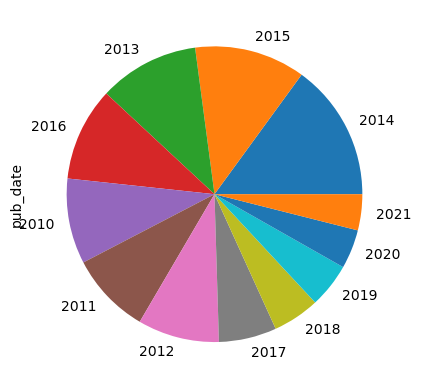

In [28]:
import matplotlib as mplt
temp.plot.pie()